In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
selected_data = pd.read_csv('D:\\ML-recap\\archive\\train.csv')
selected_data.sample(10)

C:\Users\harib\AppData\Local\Temp\ipykernel_12528\242157339.py:1: DtypeWarning: Columns (0: onpromotion) have mixed types. Specify dtype option on import or set low_memory=False.
  selected_data = pd.read_csv('D:\\ML-recap\\archive\\train.csv')


,date,locationId,item_id,unit_sales,onpromotion
27381762,2016-07-18,location_6,item_572838,11.0,False
40438322,2017-02-02,location_18,item_1089163,3.0,False
15938051,2015-12-23,location_33,item_1084437,44.0,NaN
69863877,2018-02-07,location_3,item_1157329,7.0,False
72403114,2018-03-04,location_54,item_1457000,9.0,False
90462945,2018-09-09,location_11,item_1958268,1.0,False
67402498,2018-01-11,location_45,item_1459515,8.0,False
1705724,2015-02-12,location_48,item_158789,25.0,NaN
72708823,2018-03-08,location_4,item_315474,1.0,False
70878967,2018-02-17,location_48,item_1489662,3.0,True


In [3]:
selected_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 101688779 entries, 0 to 101688778
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         str    
 1   locationId   str    
 2   item_id      str    
 3   unit_sales   float64
 4   onpromotion  object 
dtypes: float64(1), object(1), str(3)
memory usage: 3.8+ GB


In [4]:
selected_data['locationId'] = selected_data['locationId'].apply(lambda x: int(x.split('_')[1]))
selected_data['item_id'] = selected_data['item_id'].apply(lambda x: int(x.split('_')[1]))

In [9]:
selected_data['date'] = pd.to_datetime(selected_data['date'])
selected_data['year'] = selected_data['date'].dt.year
selected_data['month'] = selected_data['date'].dt.month
selected_data['day'] = selected_data['date'].dt.day

selected_data.drop(columns=['date'], inplace=True)

In [7]:
random_generator = np.random.RandomState(seed=42)
nan_rows_mask = selected_data['onpromotion'].isna()
number_of_nans = nan_rows_mask.sum()
random_boolean_values = random_generator.choice([True, False], size=number_of_nans)
selected_data.loc[nan_rows_mask, 'onpromotion'] = random_boolean_values

In [12]:
selected_data.sample(10)

,locationId,item_id,unit_sales,onpromotion,year,month,day
36452109,6,847569,2.0,False,2016,12,2
45365932,43,1150362,1.0,False,2017,4,23
9540277,50,1141956,2.0,False,2015,8,10
21398540,4,1148719,3.0,False,2016,3,28
91356720,33,1695874,3.0,False,2018,9,18
90500206,38,1243816,2.0,False,2018,9,9
4550034,49,916885,5.0,True,2015,4,20
63996680,15,959502,1.0,False,2017,12,5
6816364,23,1038937,3.0,False,2015,6,11
27727304,11,409738,1.0,False,2016,7,23


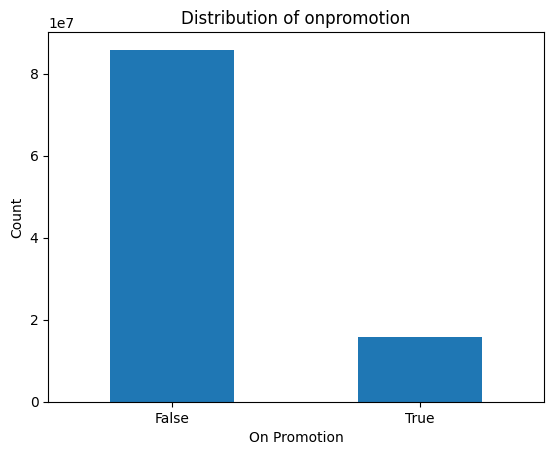

In [11]:
# barchart of onpromotion
selected_data['onpromotion'].value_counts().plot(kind='bar')
plt.title('Distribution of onpromotion')
plt.xlabel('On Promotion')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()